# Error evolution vs model polynomial

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Generar data

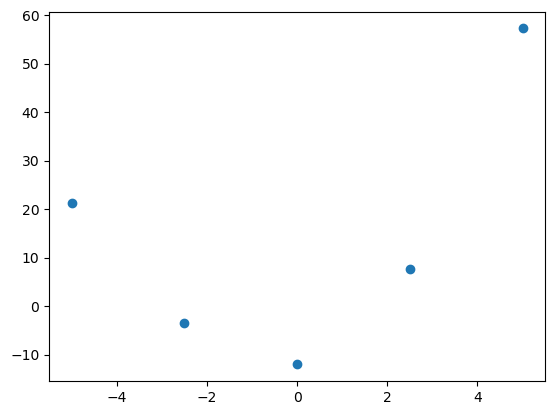

In [4]:
NOISE = 10

data_init = -5
data_end = 5
size_data = 5

A, B, C = 2, 4, -10

X = np.linspace(data_init,data_end,size_data)
Y = [(A*x**2+B*x+C)+(random.random()-0.5)*NOISE for x in X]

plt.scatter( X, Y )

## Metodos

In [6]:
# modelo : lista de parametros de la funcion, 
#          ejemplo: [2,5] = x*2+4
#          ejemplo: [3,2,5] = 3*(x**2)+2*(x)+4
def calcular_modelo(modelo, x):
    result = 0
    for i in range(len(modelo)):
        result += modelo[-1*(i+1)]*(x**i)
    return result

In [7]:
def calcular_error(modelo,data_x,data_y):
    error_total = 0
    for i in range(len(data_x)):
        predicted_y = calcular_modelo(modelo,data_x[i])
        real_y = data_y[i]
        error_total += (predicted_y-real_y)**2
    return error_total/len(data_x)

## Nodo

In [9]:
class Node:
    def __init__(self,modelo):
        self.modelo = modelo
        self.error = calcular_error(modelo,X,Y)
    def __lt__(self,other):
        return self.error < other.error
    def __str__(self):
        return f"[model:{self.modelo} , error:{self.error:.2f}]"
    def __repr__(self):
        return self.__str__()

## Solucion por grafos

In [11]:
def regresion_linear_grafos(modelo, deltas, max_iteraciones):

    solution_node = Node(modelo)
    
    for iteration in range(max_iteraciones):
    
        next_nodes = []
        
        # generar cambios en los nodos segun los deltas
        for i in range(len(solution_node.modelo)):
            copy_model_pluss = solution_node.modelo[:]
            copy_model_pluss[i] = copy_model_pluss[i] + deltas[i]
            #print(solution_node.modelo," -> ",copy_model_pluss)
            next_nodes.append( Node(copy_model_pluss) )
            copy_model_minus = solution_node.modelo[:]
            copy_model_minus[i] = copy_model_minus[i] - deltas[i]
            #print(solution_node.modelo," -> ",copy_model_minus)
            next_nodes.append( Node(copy_model_minus) )
    
        next_nodes.sort()
    
        if next_nodes[0].error < solution_node.error:
            solution_node = next_nodes[0]
        else:
            print(f"modelo({len(modelo)}) Solution found! in {iteration} iterations")
            break;

    return solution_node

# Error evolution

modelo(1) Solution found! in 14119 iterations
modelo(2) Solution found! in 17446 iterations
modelo(3) Solution found! in 16519 iterations
modelo(4) Solution found! in 15077 iterations
modelo(5) Solution found! in 13130 iterations
modelo(6) Solution found! in 13978 iterations
modelo(7) Solution found! in 14305 iterations
modelo(8) Solution found! in 14305 iterations
modelo(9) Solution found! in 14305 iterations
modelo(10) Solution found! in 14305 iterations
modelo(11) Solution found! in 14305 iterations
modelo(12) Solution found! in 14305 iterations


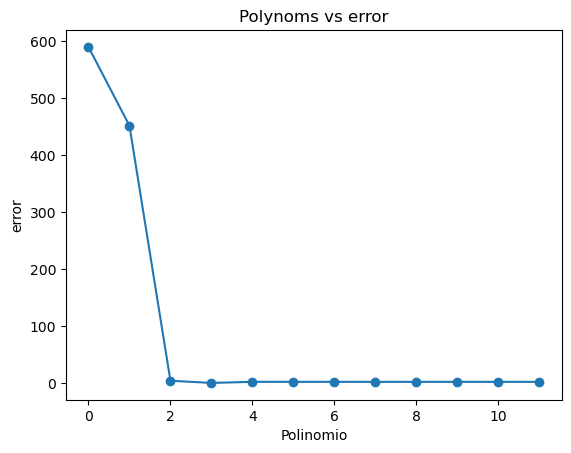

In [13]:
errors = []
for poly in range(0,12):
    
    deltas = list( np.ones( poly + 1 )*0.001 )
    modelo = list( np.zeros( poly + 1 ) )
    
    nodo_solucion = regresion_linear_grafos( modelo=modelo, deltas=deltas, max_iteraciones=100000)

    errors.append( nodo_solucion.error )

plt.title("Polynoms vs error")
plt.scatter( range(len(errors)) , errors, label="errors" )
plt.plot( range(len(errors)) , errors)
plt.xlabel("Polinomio")
plt.ylabel("error")
plt.show()